## 관심 있는 주제

자기 개발에 관한 주제- 모발 건강 예측 데이터, 피부 케어 데이터 등

## 이유

사람들은 본인을 가꾸는 일에 굉장히 많은 힘을 쓰며 살아가고 있습니다. 그 중 중요하게 여겨지는 주제로 모발 건강이 있는데, 모발 건강에는 어떠한 요소들이 영향이 미칠지, 일상 속에서 탈모를 예방할 수 있는 방법에는 어떠한 것들이 있는지 궁금해져서 선택하게 되었습니다.

# 따릉이 데이터 EDA

In [2]:
import pandas as pd

In [107]:
%pwd #현재 폴더 위치 확인

'C:\\Users\\6aimh\\OneDrive\\바탕 화면\\b.a.f'

#### 상대경로로 파일 불러오기

In [4]:
cycle=pd.read_csv("./train.csv",encoding='cp949')
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기
%matplotlib inline

# 가설 세우기

- 기온이 높으면 자전거 대여 수가 적을 것이다.
- 습도가 높으면 자전거 대여 수가 적을 것이다.
- 바람 세기가 세면 자전거 대여 수가 적을 것이다.
- 태양 복사열이 세면 자전거 대여 수가 적을 것이다.
- 강우량이 많으면 자전거 대여 수가 적을 것이다.
- 적설량이 많으면 자전거 대여 수가 적을 것이다.
- 겨울이 가장 자전거 대여 수가 적을 것이다.
- 휴일이 평일에 비해 자전거 대여 수가 많을 것이다.
- 기능 가능일에만 자전거를 대여할 수 있을 것이다. 
- 기온, 강우량, 강설량이 자전거 대여 수에 큰 영향을 미칠 것이다.
- 휴일여부와 계절에 따라서 나뉘는 자전거 대여 수는 멱확하게 보일 것이다.
- 평일에는 출퇴근길 직장인들의 사용량이 많을 것이다. 따라서 사용 시간은 짧을 것이다.
- 휴일에는 나들이 나온 사람들의 사용량이 많을 것이다. 따라서 사용 시간은 길 것이다.
- 학생들 여름방학 기간인 7, 8월에는 자전거 사용량이 많을 것이다.

# 피처 설명
- Date                           : 날짜
- Rented Bike Count              : 대여한 자전거 수
- Hour                           : 대여 시간
- Temperature(°C)               : 기온(°C)
- Humidity(%)                    : 습도(%)
- Wind speed (m/s)               : 바람 세기(m/s)
- Visibility (10m)               : 시야(10m)
- Dew point temperature(°C)     : 노점온도(일정한 압력에서 공기의 온도를 낮추어 갈 때 공기 중의 수증기가 포화하여 이슬이 맺힐 때의 온도,습도에 비례)
- Solar Radiation (MJ/m2)        : 태양 복사열(MJ/m2)
- Rainfall(mm)                   : 강우량(mm)
- Snowfall (cm)                  : 적설량(cm)
- Seasons                        : 계절
- Holiday                        : 휴일
- Functioning Day                : 기능 가능일
                       
              


# 1. 데이터 살펴보기
>정보 확인


In [6]:
cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            6306 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           6303 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    6309 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-null   objec

> 기술통계량 확인

In [7]:
cycle.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


> 결측치 확인하기

In [8]:
cycle.isna().sum().sort_values()

Date                           0
Rented Bike Count              0
Hour                           0
Humidity(%)                    0
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Holiday                        0
Functioning Day                0
Seasons                      699
Temperature(°C)              702
Wind speed (m/s)             705
dtype: int64

각 피처당 전체 데이터에 대한 결측값의 비율이 어느정도인지 알아보려고 한다.

In [9]:
na=cycle.isna().sum().values
total=cycle.count().values
index1=cycle.columns
data1={'na':na,'total': total}
na_1=pd.DataFrame(data=data1,index=index1)
na_1
na_1['na_percent']=round(na_1['na']/na_1['total']*100,2)
na_1

,na,total,na_percent
Date,0,7008,0.00
Rented Bike Count,0,7008,0.00
Hour,0,7008,0.00
Temperature(°C),702,6306,11.13
Humidity(%),0,7008,0.00
Wind speed (m/s),705,6303,11.19
Visibility (10m),0,7008,0.00
Dew point temperature(°C),0,7008,0.00
Solar Radiation (MJ/m2),0,7008,0.00
Rainfall(mm),0,7008,0.00


-> 결측값이 대부분인 피처라면 데이터 분석 과정에서 불필요하다고 느껴서 없애려고 했지만 결측값이 있는 Temperature(°C), Wind speed (m/s), Seasons 피처에서 결측값의 비율이 11% 정도로, 대부분을 차지하지 않는다고 판단했기에 이 피처들도 가져가려고 한다.

#### Temperature(°C), Wind speed (m/s), Seasons 피처를 na값에 집중해서 살펴보자

In [10]:
cycle[cycle['Temperature(°C)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
6,04/07/2018,941,11,NaN,60,2.3,1861,21.3,2.61,0.0,0.0,Summer,No Holiday,Yes
11,24/05/2018,1390,7,NaN,61,1.3,1818,5.1,0.42,0.0,0.0,Spring,No Holiday,Yes
18,10/04/2018,133,21,NaN,70,7.3,1634,11.9,0.00,0.5,0.0,Spring,No Holiday,Yes
19,10/11/2018,754,0,NaN,77,0.9,433,7.4,0.00,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,27/02/2018,72,5,NaN,50,0.1,1026,-8.6,0.00,0.0,0.0,Winter,No Holiday,Yes
6979,23/02/2018,42,0,NaN,86,2.7,54,-0.3,0.00,0.4,0.4,Winter,No Holiday,Yes
6983,28/11/2018,1540,8,NaN,29,1.1,1337,-14.1,0.02,0.0,0.0,NaN,No Holiday,Yes
6999,15/11/2018,1416,17,NaN,38,1.4,884,-0.3,0.29,0.0,0.0,Autumn,No Holiday,Yes


<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

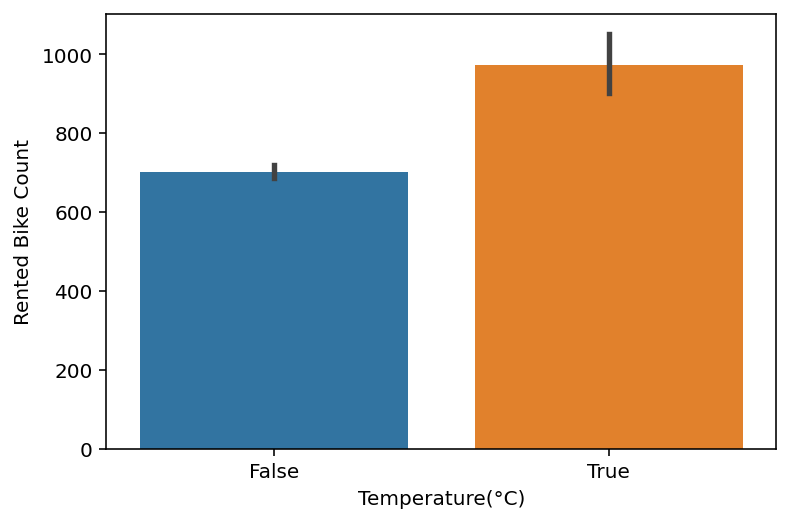

In [113]:
sns.barplot(x=cycle['Temperature(°C)']>=33,y=cycle['Rented Bike Count'])

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Hour'>

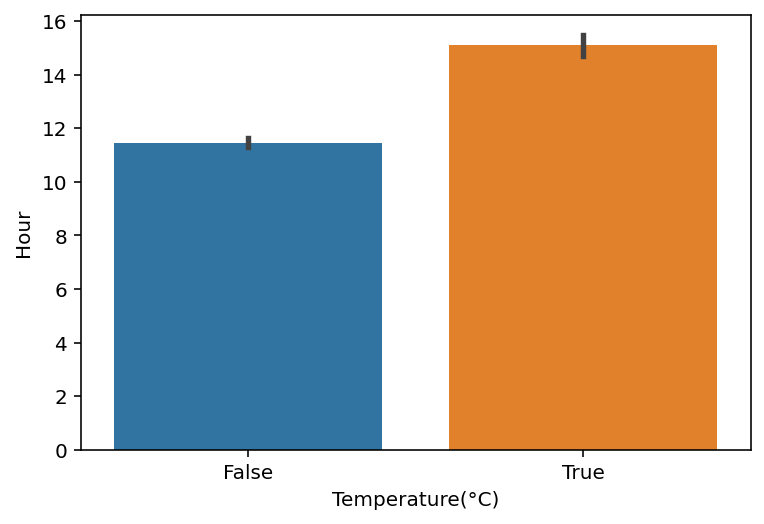

In [114]:
sns.barplot(x=cycle['Temperature(°C)']>=33,y=cycle['Hour'])

#### Temperature(°C) 피처의 결측값은 이 피처의 평균값으로 대체하겠다.

In [12]:
cycle['Temperature(°C)'].fillna(cycle['Temperature(°C)'].mean(),inplace=True)
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,13.030082,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.000000,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.200000,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.200000,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.700000,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.600000,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.600000,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.700000,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.500000,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


In [13]:
cycle[cycle['Wind speed (m/s)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
10,21/03/2018,374,10,3.600000,37,NaN,2000,-9.7,0.83,0.0,0.0,Spring,No Holiday,Yes
23,14/03/2018,309,1,13.700000,73,NaN,1182,8.9,0.00,0.0,0.0,Spring,No Holiday,Yes
33,26/06/2018,26,14,21.000000,97,NaN,381,20.4,0.26,2.5,0.0,Summer,No Holiday,Yes
51,09/01/2018,320,9,-6.000000,61,NaN,1547,-12.3,0.13,0.0,0.6,Winter,No Holiday,Yes
52,16/07/2018,688,11,31.500000,51,NaN,1498,20.1,2.83,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,11/10/2018,1398,21,13.030082,52,NaN,2000,0.0,0.00,0.0,0.0,Autumn,No Holiday,Yes
6953,08/03/2018,17,5,3.100000,90,NaN,974,1.6,0.00,0.0,0.0,Spring,No Holiday,Yes
6975,22/09/2018,1062,11,22.700000,55,NaN,1297,13.1,1.86,0.0,0.0,Autumn,No Holiday,Yes
6993,06/05/2018,211,13,16.400000,94,NaN,1947,15.4,0.78,0.0,0.0,Spring,No Holiday,Yes


In [14]:
cycle[cycle['Seasons'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,13.030082,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
22,31/08/2018,987,14,29.300000,41,1.9,1928,14.6,3.00,0.0,0.0,NaN,No Holiday,Yes
30,09/11/2018,0,23,10.900000,76,1.2,456,6.8,0.00,0.0,0.0,NaN,No Holiday,No
47,15/09/2018,1566,18,13.030082,76,1.2,2000,19.6,0.12,0.0,0.0,NaN,No Holiday,Yes
55,24/01/2018,121,22,-15.200000,45,4.0,2000,-24.4,0.00,0.0,0.7,NaN,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,15/03/2018,567,21,10.400000,96,2.7,499,9.7,0.00,0.0,0.0,NaN,No Holiday,Yes
6968,22/07/2018,772,1,13.030082,60,0.8,2000,18.8,0.00,0.0,0.0,NaN,No Holiday,Yes
6983,28/11/2018,1540,8,13.030082,29,1.1,1337,-14.1,0.02,0.0,0.0,NaN,No Holiday,Yes
6988,13/06/2018,2088,14,26.600000,50,2.4,1119,15.3,2.95,0.0,0.0,NaN,No Holiday,Yes


#### 중복값 확인하기

In [15]:
cycle[cycle.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


#### 날짜 오름차순에 따라 데이터 정리

In [17]:
cycle['Date']=pd.to_datetime(cycle['Date'],dayfirst=True)
cycle=cycle.sort_values(by='Date')
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2198,2017-12-01,181,6,13.030082,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
2442,2017-12-01,107,3,-6.200000,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5689,2017-12-01,447,14,3.000000,26,2.0,2000,-14.6,1.01,0.0,0.0,Winter,No Holiday,Yes
613,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
1659,2017-12-01,398,22,13.030082,83,1.5,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,2018-11-30,720,12,6.600000,35,1.3,1409,-7.8,1.70,0.0,0.0,Autumn,No Holiday,Yes
4091,2018-11-30,116,4,13.030082,71,0.4,1345,-5.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
1627,2018-11-30,456,1,1.300000,63,2.0,1379,-4.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
54,2018-11-30,740,13,7.100000,24,2.8,1838,-12.1,1.83,0.0,0.0,Autumn,No Holiday,Yes


#### -> 계절 데이터에 결측치가 있으므로 3,4,5월은 봄, 6,7,8월은 여름, 9,10,11월은 가을, 12,1,2월은 겨울로 다시 설정.

In [18]:
def change(date):
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'
    elif date.month in [12, 1, 2]:
        return 'Winter'
    else:
        return 'N'
cycle['Seasons']=cycle['Date'].apply(lambda x : change(x))
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2198,2017-12-01,181,6,13.030082,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
2442,2017-12-01,107,3,-6.200000,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5689,2017-12-01,447,14,3.000000,26,2.0,2000,-14.6,1.01,0.0,0.0,Winter,No Holiday,Yes
613,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
1659,2017-12-01,398,22,13.030082,83,1.5,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,2018-11-30,720,12,6.600000,35,1.3,1409,-7.8,1.70,0.0,0.0,Autumn,No Holiday,Yes
4091,2018-11-30,116,4,13.030082,71,0.4,1345,-5.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
1627,2018-11-30,456,1,1.300000,63,2.0,1379,-4.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
54,2018-11-30,740,13,7.100000,24,2.8,1838,-12.1,1.83,0.0,0.0,Autumn,No Holiday,Yes


#### Wind speed (m/s) 피처의 결측값은 이 피처의 평균값으로 대체하겠다.

In [115]:
cycle['Wind speed (m/s)'].fillna(cycle['Wind speed (m/s)'].mean(),inplace=True)
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,181,6,13.030082,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,107,3,-6.200000,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,447,14,3.000000,26,2.0,2000,-14.6,1.01,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,12
4,2017-12-01,398,22,13.030082,83,1.5,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,720,12,6.600000,35,1.3,1409,-7.8,1.70,0.0,0.0,Autumn,No Holiday,Yes,11
7004,2018-11-30,116,4,13.030082,71,0.4,1345,-5.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,11
7005,2018-11-30,456,1,1.300000,63,2.0,1379,-4.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,11
7006,2018-11-30,740,13,7.100000,24,2.8,1838,-12.1,1.83,0.0,0.0,Autumn,No Holiday,Yes,11


Index 깔끔하게 하게 위해서 0부터 7007까지로 수정

In [116]:
cycle.index=np.arange(7008)
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,181,6,13.030082,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,107,3,-6.200000,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,447,14,3.000000,26,2.0,2000,-14.6,1.01,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,12
4,2017-12-01,398,22,13.030082,83,1.5,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,720,12,6.600000,35,1.3,1409,-7.8,1.70,0.0,0.0,Autumn,No Holiday,Yes,11
7004,2018-11-30,116,4,13.030082,71,0.4,1345,-5.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,11
7005,2018-11-30,456,1,1.300000,63,2.0,1379,-4.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,11
7006,2018-11-30,740,13,7.100000,24,2.8,1838,-12.1,1.83,0.0,0.0,Autumn,No Holiday,Yes,11


#### Season 피처 살펴보기

In [117]:
cycle['Seasons'].value_counts()

Summer    1771
Autumn    1760
Winter    1750
Spring    1727
Name: Seasons, dtype: int64

추가로 월 별 데이터를 보기 위해 'Month' 열을 추가하자

In [88]:
cycle['Month']=cycle['Date'].dt.month
cycle.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,181,6,13.030082,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,107,3,-6.200000,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,447,14,3.000000,26,2.0,2000,-14.6,1.01,0.0,0.0,Winter,No Holiday,Yes,12


Text(0.5, 1.0, 'correlation heatmap')

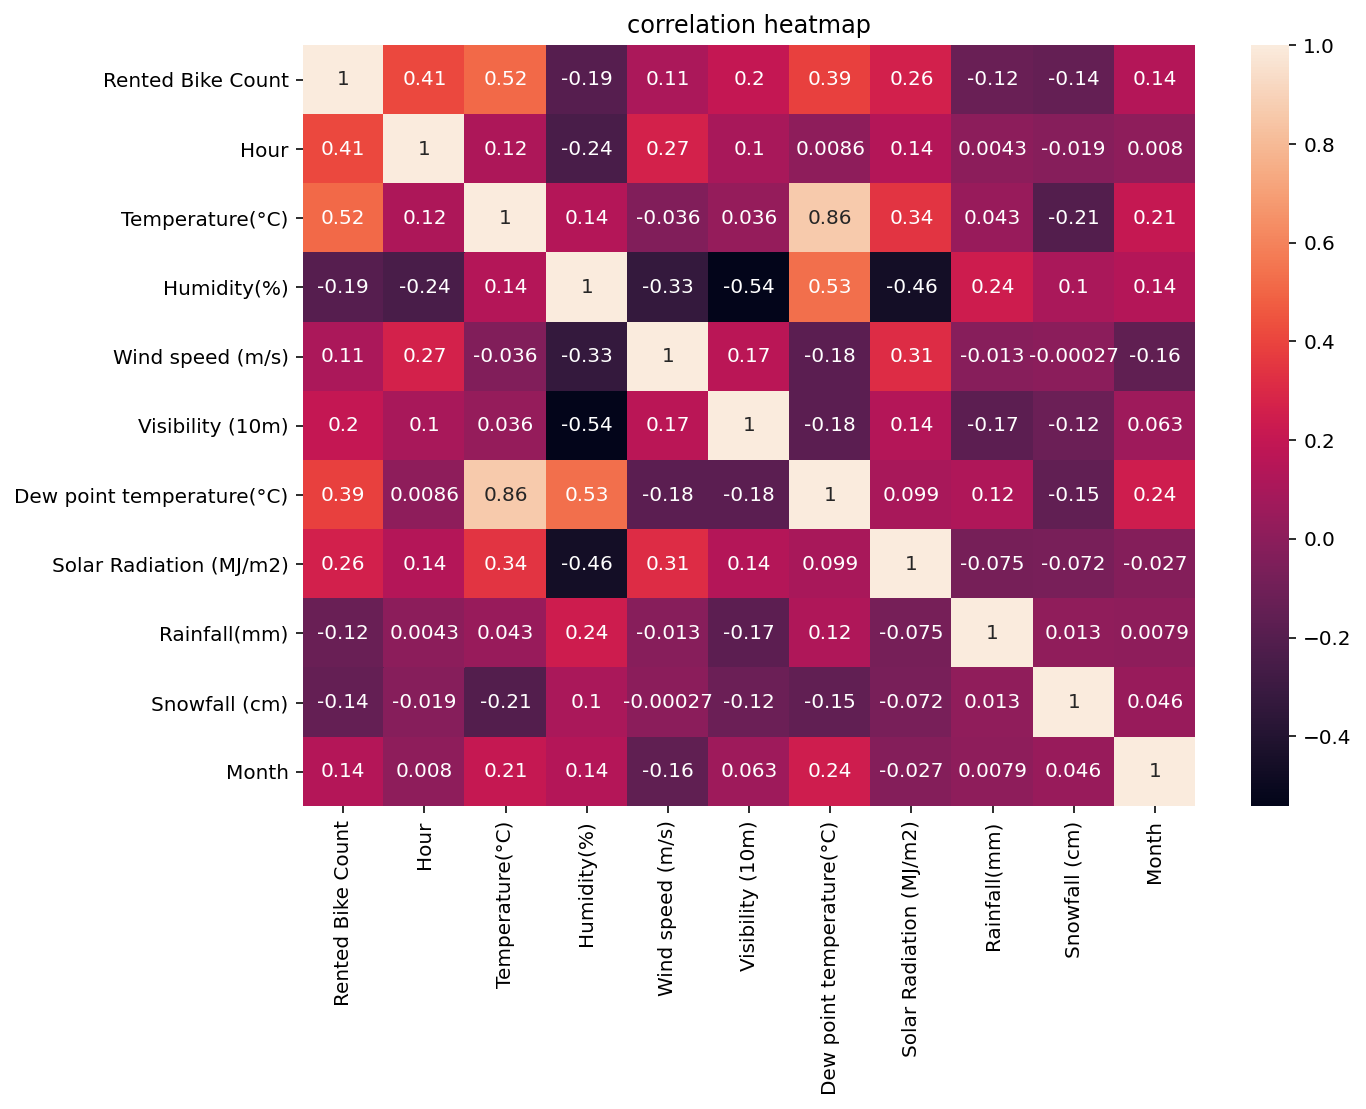

In [118]:
cycle[['Date','Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Month']]
plt.figure(figsize=(10,7))  #사이즈 조정
sns.heatmap(cycle[['Date','Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Month']].corr(),annot=True)
plt.title('correlation heatmap') #상관계수 행렬 히트맵

- 자전거 대여 수와의 상관계수가 가장 큰 피처는 'Temperature(°C)'이다.
- 그 뒤로는 'Hour', 'Dew point temperature(°C)'가 뒤따른다. 

종속변수 Rented Bike Count를 살펴보자

In [90]:
cycle['Rented Bike Count'].value_counts()

0       236
103      17
178      16
122      16
223      15
       ... 
2002      1
2014      1
2018      1
2656      1
2043      1
Name: Rented Bike Count, Length: 2038, dtype: int64

Rented Bike Count와 다른 변수 간의 관계성 파악하기

1. Temperature(°C)
- 20~30 사이에 밀집 되어 있음.

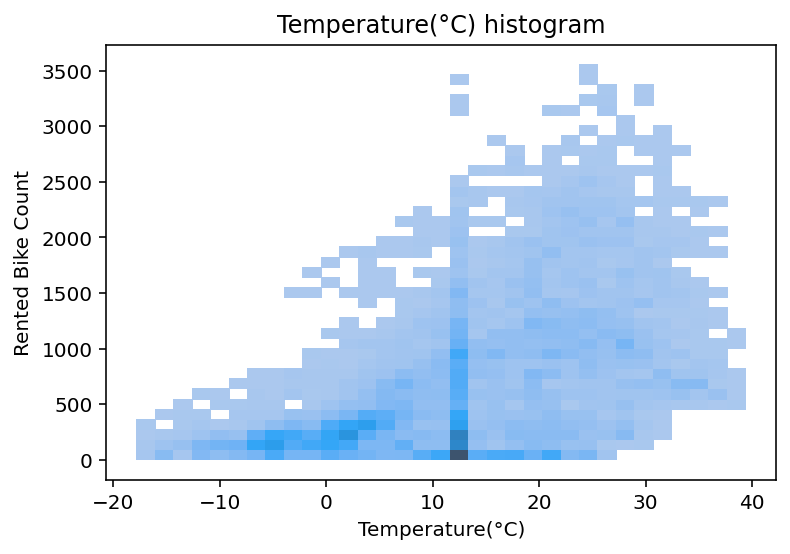

In [140]:
sns.histplot(x='Temperature(°C)',y='Rented Bike Count',data=cycle,kde=True)
plt.title('Temperature(°C) histogram',fontsize=12)
plt.show()

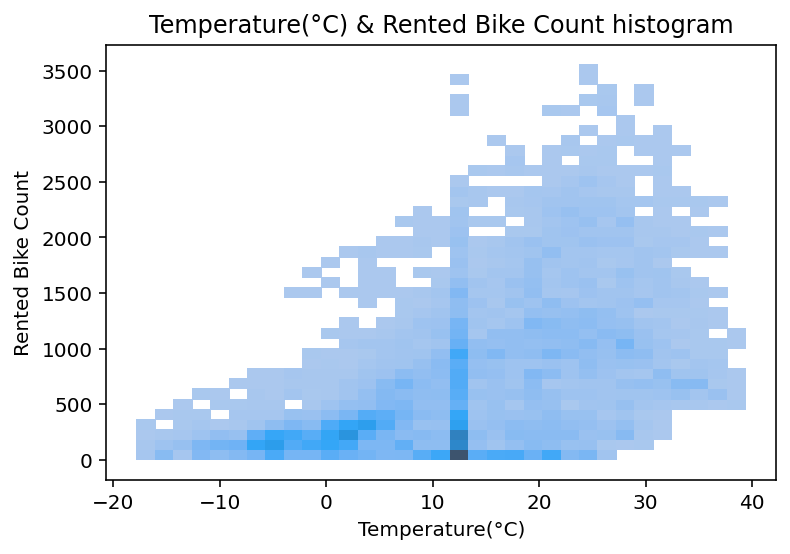

In [152]:
sns.histplot(x='Temperature(°C)', y='Rented Bike Count',kde=True,data=cycle)
plt.title('Temperature(°C) & Rented Bike Count histogram',fontsize=12)
plt.show()

2. Humidity(%)
- 건조할 때보다 습할 때 자전거를 더 많이 탄다는 사실을 알 수 있음.

Text(0.5, 1.0, 'Humidity(%) & Rented Bike Count histogram')

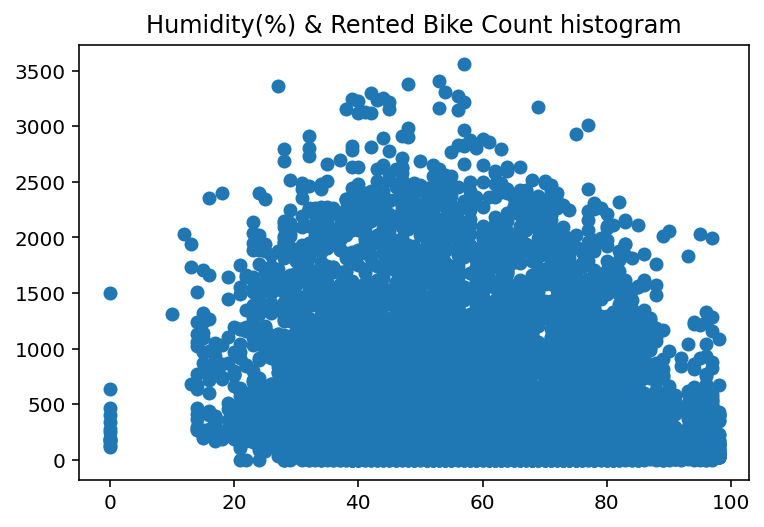

In [161]:
plt.scatter(cycle['Humidity(%)'],cycle['Rented Bike Count'])
plt.title('Humidity(%) & Rented Bike Count histogram',fontsize=12)

3. Wind speed (m/s)
- 풍속 5m/s 이상부터는 자전거 이용 수가 줄어듦을 알 수 있음.

<AxesSubplot:xlabel='Wind speed (m/s)', ylabel='Rented Bike Count'>

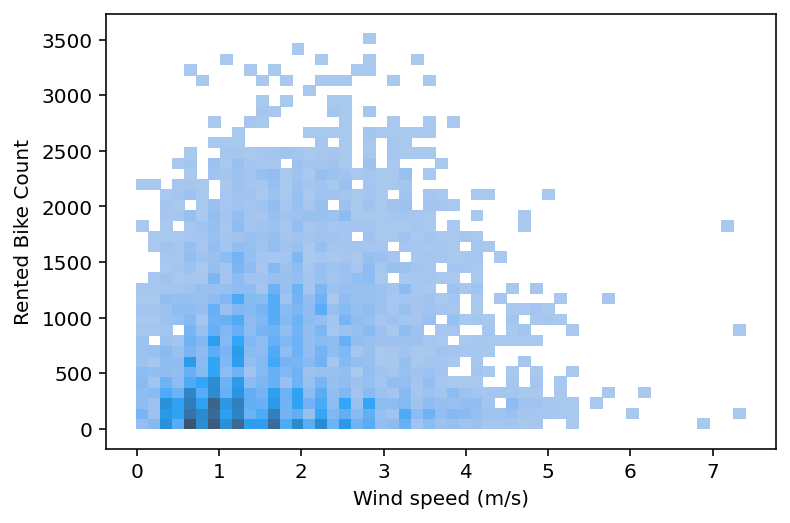

In [95]:
sns.histplot(x='Wind speed (m/s)',y='Rented Bike Count',data=cycle)

4. Dew point temperature(°C)
- 노점온도가 높아짐에 따라 자전거 이용 수가 늘어남을 알 수 있음.

<AxesSubplot:xlabel='Dew point temperature(°C)', ylabel='Rented Bike Count'>

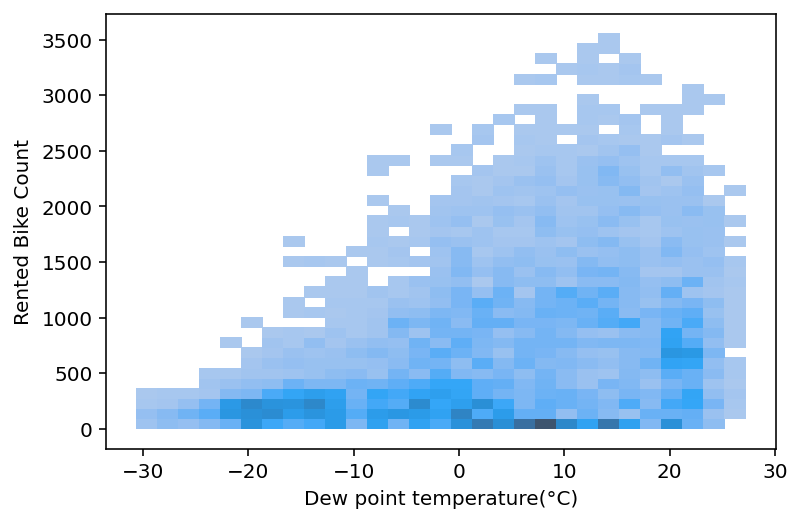

In [163]:
sns.histplot(x='Dew point temperature(°C)',y='Rented Bike Count',data=cycle)

5. Solar Radiation (MJ/m2)

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)', ylabel='Rented Bike Count'>

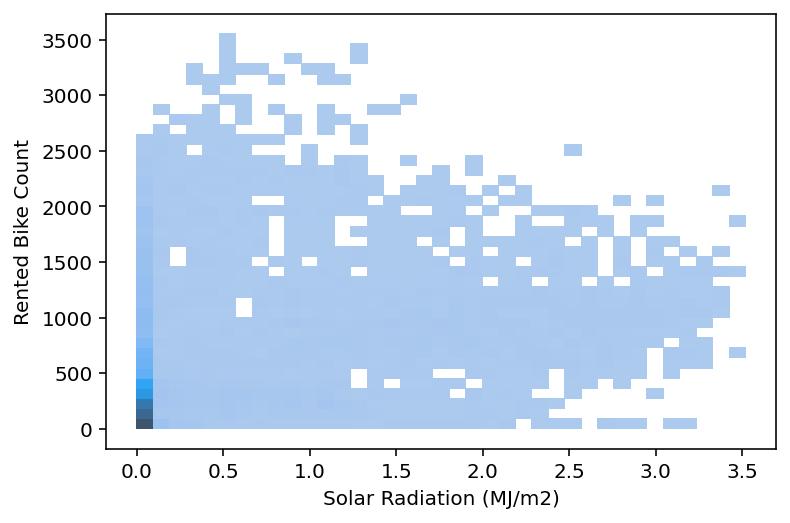

In [97]:
sns.histplot(x='Solar Radiation (MJ/m2)',y='Rented Bike Count',data=cycle)

6. Rainfall(mm)
- 강우량이 적은 쪽에 자전거 이용자 수가 많이 분포되어있음.

<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

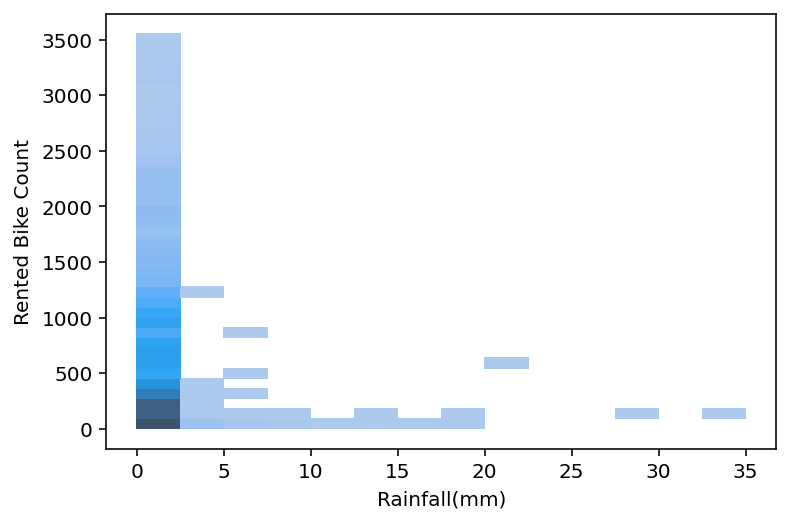

In [98]:
sns.histplot(x='Rainfall(mm)',y='Rented Bike Count',data=cycle)

7. Snowfall (cm)
- 적설량이 적은 쪽에 자전거 이용자 수가 많이 분포되어있음

<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

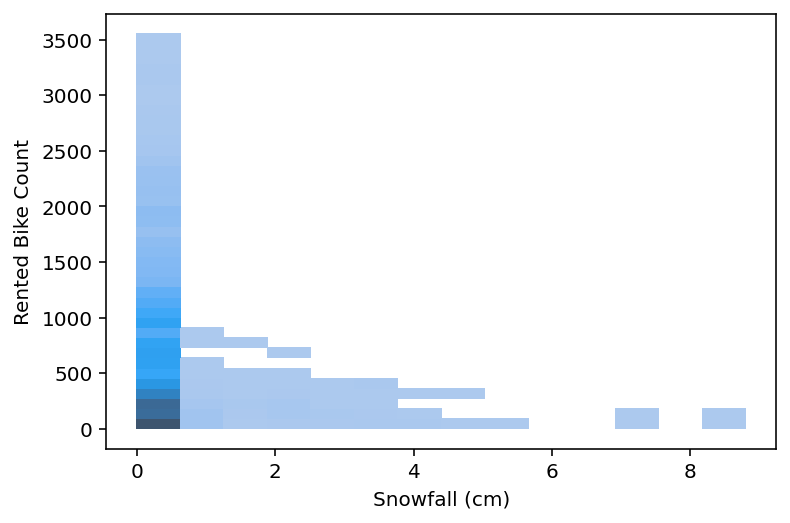

In [99]:
sns.histplot(x='Snowfall (cm)',y='Rented Bike Count',data=cycle)

8. Seasons
- 겨울에 이용하는 자전거 수가 가장 적음.
- 여름에 이용하는 자전거 수가 가장 많음.

Text(0.5, 1.0, 'Rented Bike Count / Seasons')

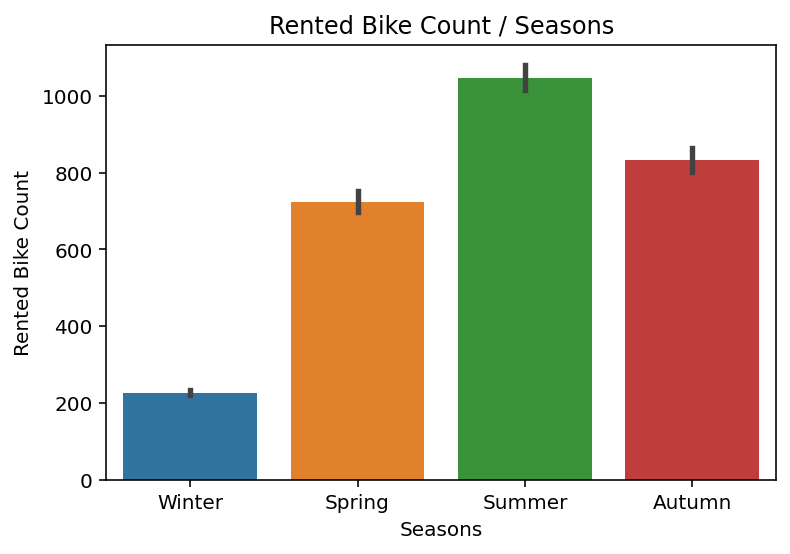

In [167]:
sns.barplot(x='Seasons',y='Rented Bike Count',data=cycle)
plt.title('Rented Bike Count / Seasons')

9. Holiday
- 휴일보다 평일에 이용하는 자전거 수가 더 많음.

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

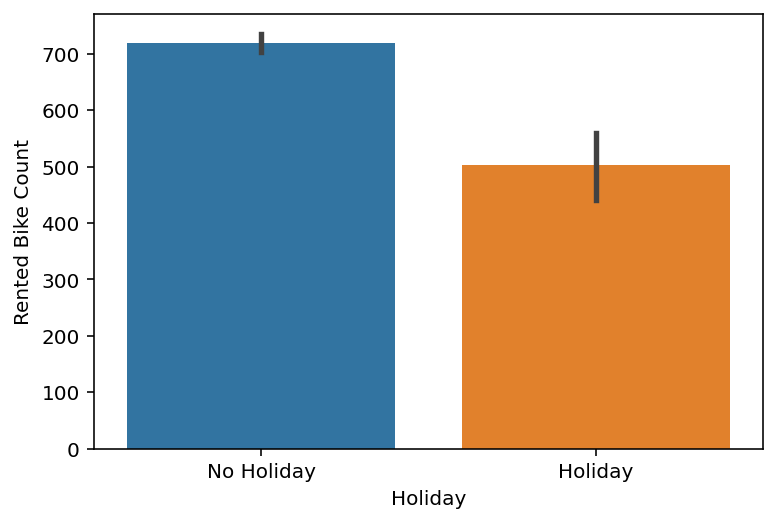

In [101]:
sns.barplot(x='Holiday',y='Rented Bike Count',data=cycle)

10. Functioning Day
- 기능 가능일에만 자전거를 이용할 수 있음.

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

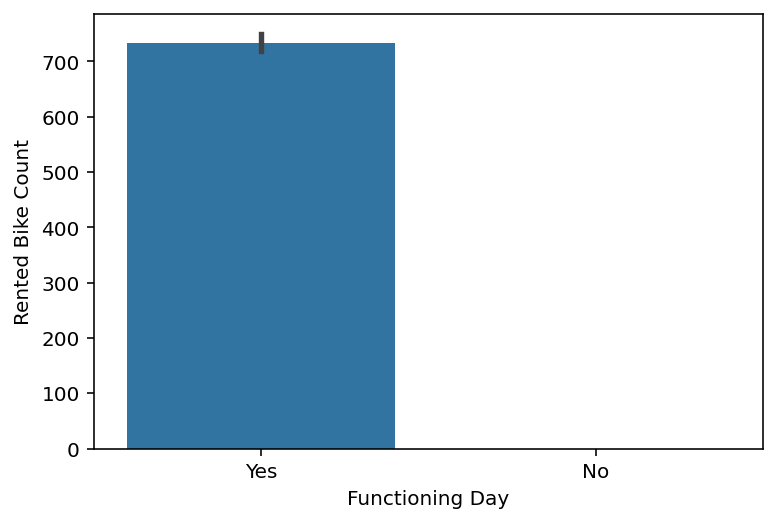

In [102]:
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=cycle)

11. Visibility
- 시야가 잘 보일수록 자전거 이용 수가 많아짐.

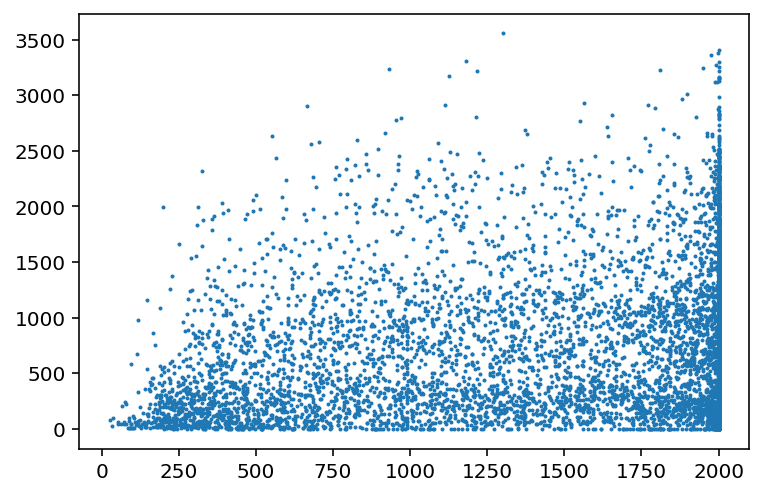

In [103]:
plt.scatter(cycle["Visibility (10m)"], cycle["Rented Bike Count"], s=1)
plt.show()

12. Month
- 6월에 이용하는 자전거 수가 가장 많음.
- 1,2,12월, 즉 겨울에 이용 수가 줄어드는 걸 확실히 알 수 있음.

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

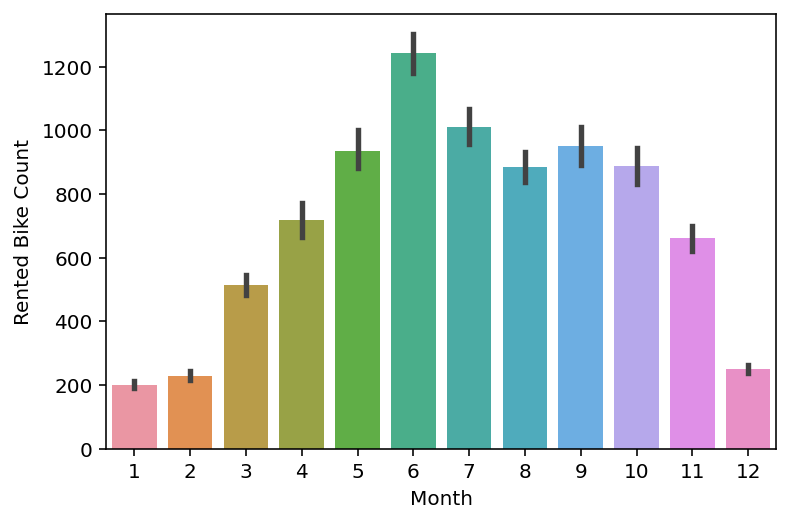

In [105]:
sns.barplot(x=cycle['Month'],y=cycle['Rented Bike Count'])

# Hour와 Holiday 간 관계성 살펴보기
- 휴일보다 휴일이 아닌 날에 더 오랜 시간 자전거를 이용한다는 사실을 알 수 있음.

<AxesSubplot:xlabel='Hour', ylabel='count'>

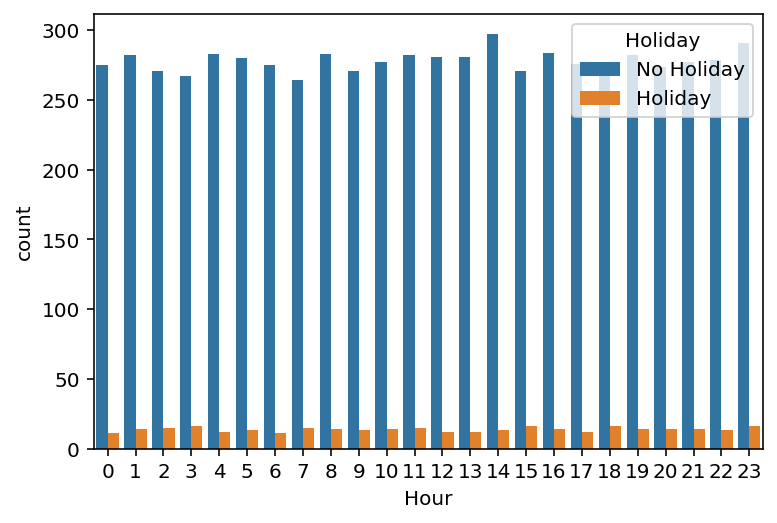

In [172]:
sns.countplot(x='Hour',hue= 'Holiday',data=cycle)